<a href="https://colab.research.google.com/github/MANOJHRMANOJHR/ai_assignments/blob/main/Unsupervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

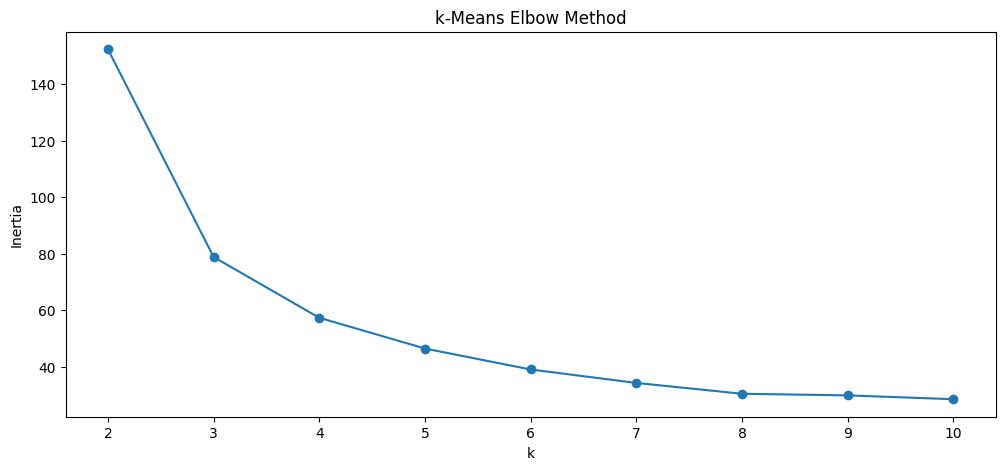

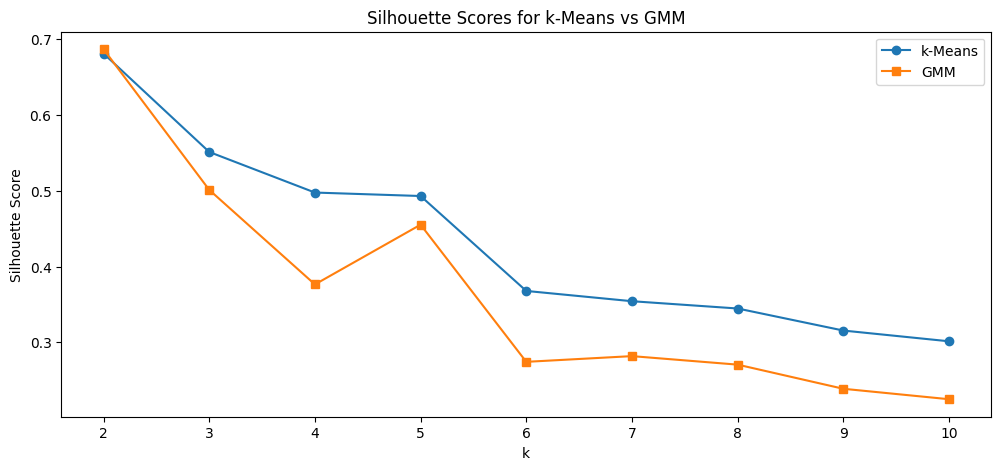

Best k for k-Means: 2
Best k for GMM: 2

--- Final Model Evaluation ---
k-Means Silhouette: 0.6810461692117462
GMM Silhouette: 0.6867350732769777
k-Means ARI: 0.5399218294207123
GMM ARI: 0.5681159420289855


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load dataset (use digits by replacing load_iris with load_digits())
data = load_iris()
X = data.data
y_true = data.target

# --------------------- Choosing k ---------------------
K_RANGE = range(2, 11)
kmeans_inertia = []
kmeans_sil = []
gmm_sil = []

for k in K_RANGE:
    # k-Means
    km = KMeans(n_clusters=k, random_state=42)
    km_labels = km.fit_predict(X)
    kmeans_inertia.append(km.inertia_)
    kmeans_sil.append(silhouette_score(X, km_labels))

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X)
    gmm_sil.append(silhouette_score(X, gmm_labels))

# --------------------- Elbow Plot ---------------------
plt.figure(figsize=(12, 5))
plt.plot(K_RANGE, kmeans_inertia, marker='o')
plt.title("k-Means Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# --------------------- Silhouette Plot ---------------------
plt.figure(figsize=(12, 5))
plt.plot(K_RANGE, kmeans_sil, marker='o', label="k-Means")
plt.plot(K_RANGE, gmm_sil, marker='s', label="GMM")
plt.title("Silhouette Scores for k-Means vs GMM")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

# Choose best k based on silhouette
best_k_kmeans = K_RANGE[np.argmax(kmeans_sil)]
best_k_gmm = K_RANGE[np.argmax(gmm_sil)]

print("Best k for k-Means:", best_k_kmeans)
print("Best k for GMM:", best_k_gmm)

# --------------------- Final Models ---------------------
kmeans_final = KMeans(n_clusters=best_k_kmeans, random_state=42)
gmm_final = GaussianMixture(n_components=best_k_gmm, random_state=42)

kmeans_labels = kmeans_final.fit_predict(X)
gmm_labels = gmm_final.fit_predict(X)

# --------------------- Evaluation ---------------------
print("\n--- Final Model Evaluation ---")
print("k-Means Silhouette:", silhouette_score(X, kmeans_labels))
print("GMM Silhouette:", silhouette_score(X, gmm_labels))

# ARI (uses true labels, not used in fitting)
print("k-Means ARI:", adjusted_rand_score(y_true, kmeans_labels))
print("GMM ARI:", adjusted_rand_score(y_true, gmm_labels))
